<h3> Task 1</h3>

Verify the correctness of the above protocol.

For each pair of $ (a,b) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
- Create a quantum circuit with two qubits: Asja's and Balvis' qubits
- Both are initially set to $ \ket{0} $
- Apply h-gate (Hadamard) to Asja's qubit
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.

<ul>
    <li> If $ a $ is 1, then apply z-gate to Asja's qubit. </li>
    <li> If $ b $ is 1, then apply x-gate (NOT) to Asja's qubit. </li>
</ul>

Assume that Asja sends her qubit to Balvis.
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
- Apply h-gate (Hadamard) to Asja's qubit
- Measure both qubits and compare the results with pair $ (a,b) $

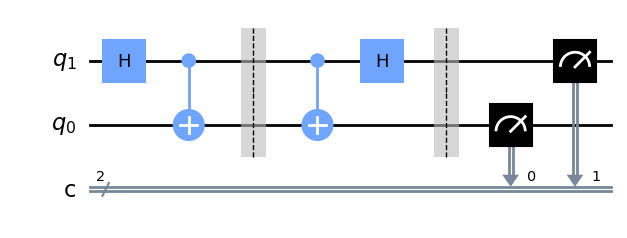

00 --> {'00': 100}


C:\Users\jrnat\AppData\Local\Temp\ipykernel_18640\3823489238.py:47: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)


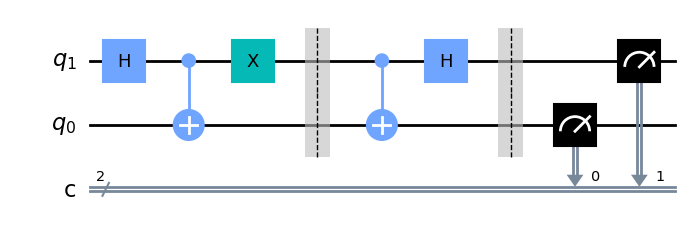

01 --> {'01': 100}


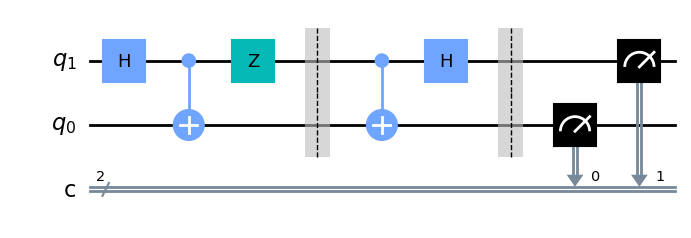

10 --> {'10': 100}


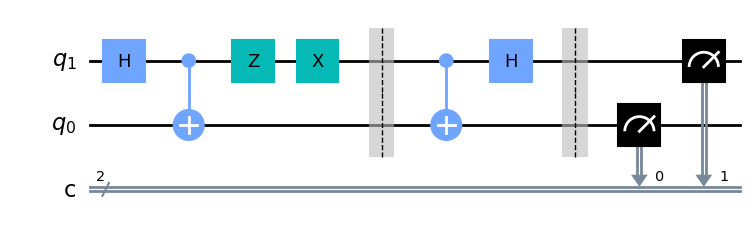

11 --> {'11': 100}


In [11]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

<h3> Task 3</h3>

Can the above set-up be used by Balvis?

Verify that the following modified protocol allows Balvis to send two classical bits by sending only his qubit.

For each pair of $ (a,b) \in \left\{ (0,0), (0,1), (1,0),(1,1) \right\} $:
- Create a quantum circuit with two qubits: Asja's and Balvis' qubits
- Both are initially set to $ \ket{0} $
- Apply h-gate (Hadamard) to Asja's qubit
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.

<ul>
    <li> If $ a $ is 1, then apply z-gate to Balvis' qubit. </li>
    <li> If $ b $ is 1, then apply x-gate (NOT) to Balvis' qubit. </li>
</ul>

Assume that Balvis sends his qubit to Asja.
- Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
- Apply h-gate (Hadamard) to Asja's qubit
- Measure both qubits and compare the results with pair $ (a,b) $

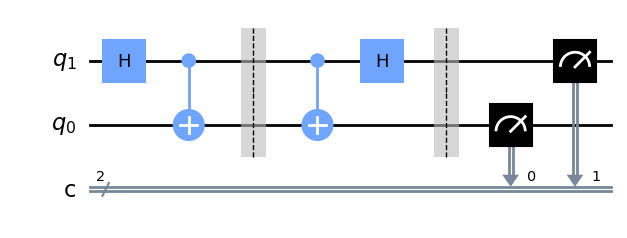

C:\Users\jrnat\AppData\Local\Temp\ipykernel_18640\2321468922.py:47: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)


00 --> {'00': 100}


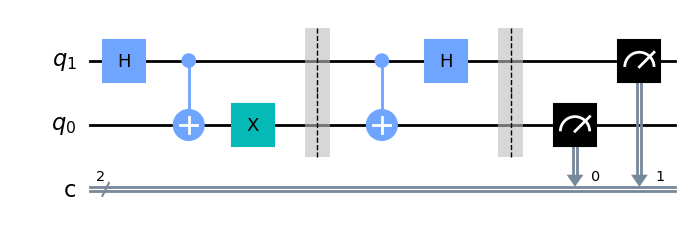

01 --> {'01': 100}


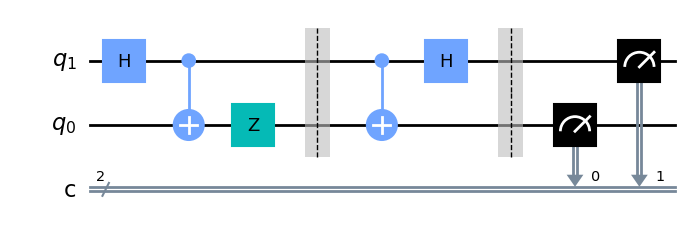

10 --> {'10': 100}


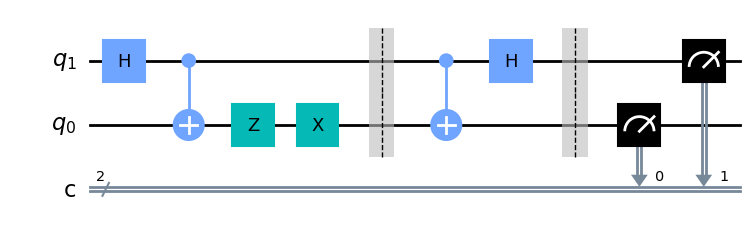

11 --> {'11': 100}


In [10]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Balvis' qubit
    if pair[0]=='1': 
        qc.z(q[0])
    
    # if b is 1, then apply x-gate (NOT) to Balvis' qubit
    if pair[1]=='1': 
        qc.x(q[0])
    
    # Balvis sends his qubit to Asja
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)